In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Load Data
df =pd.read_csv('C:\\Users\\adetu\\Desktop\\website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [ ]:
# Data Overview
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

### BASIC EDA 

C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\712650459.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Theme', y='Conversion Rate', data=df, ci=None, palette="muted")
C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\712650459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Theme', y='Conversion Rate', data=df, ci=None, palette="muted")


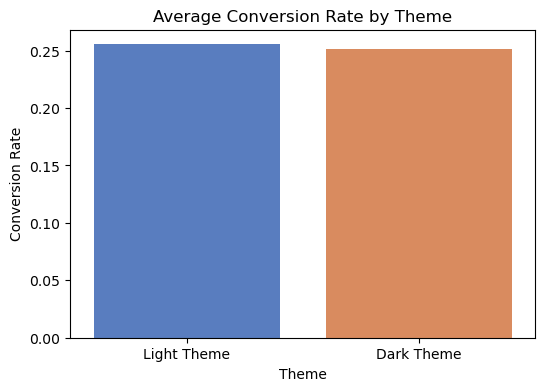

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x='Theme', y='Conversion Rate', data=df, ci=None, palette="muted")
plt.title("Average Conversion Rate by Theme")
plt.ylabel("Conversion Rate")
plt.show()


C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\4084715928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Theme', y=var, data=df, palette="coolwarm")


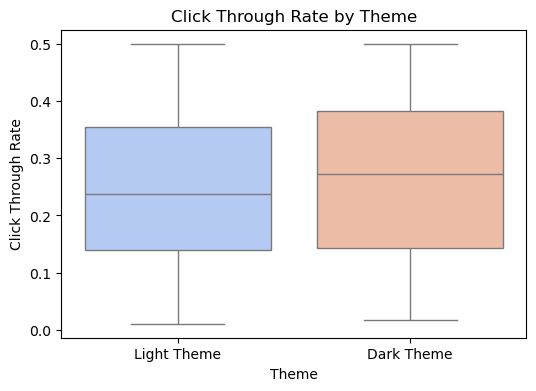

C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\4084715928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Theme', y=var, data=df, palette="coolwarm")


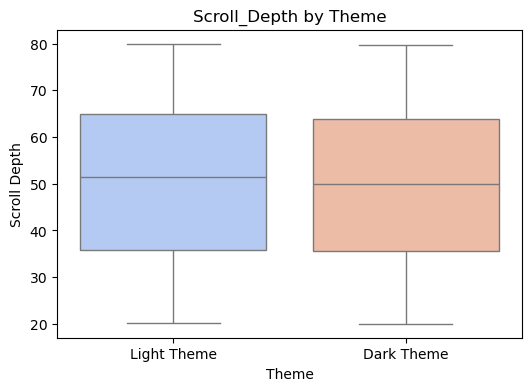

C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\4084715928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Theme', y=var, data=df, palette="coolwarm")


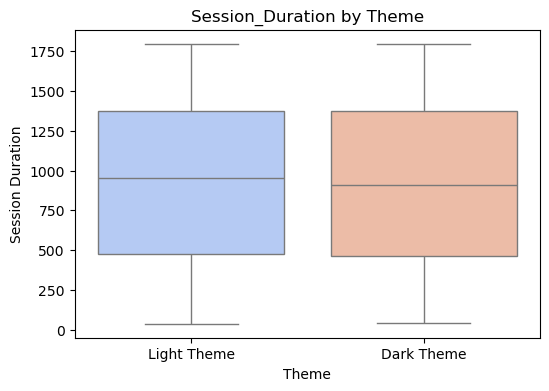

In [5]:
continuous_vars = ['Click Through Rate', 'Scroll_Depth', 'Session_Duration']

for var in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Theme', y=var, data=df, palette="coolwarm")
    plt.title(f"{var} by Theme")
    plt.ylabel(var.replace("_", " "))
    plt.show()


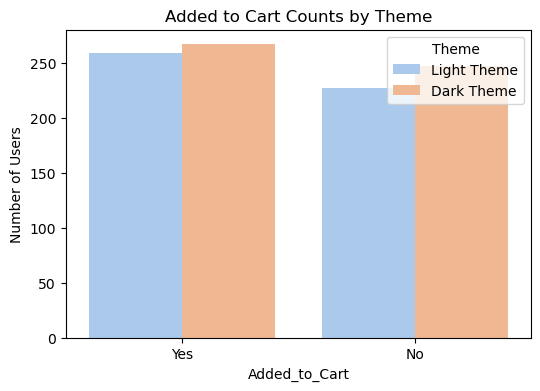

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Added_to_Cart', hue='Theme', data=df, palette="pastel")
plt.title("Added to Cart Counts by Theme")
plt.ylabel("Number of Users")
plt.show()


C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\3083643658.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Theme', y='Bounce Rate', data=df, ci=None, palette="muted")
C:\Users\adetu\AppData\Local\Temp\ipykernel_2780\3083643658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Theme', y='Bounce Rate', data=df, ci=None, palette="muted")


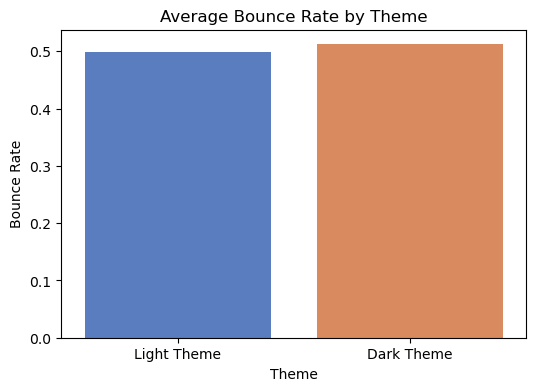

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x='Theme', y='Bounce Rate', data=df, ci=None, palette="muted")
plt.title("Average Bounce Rate by Theme")
plt.ylabel("Bounce Rate")
plt.show()


In [ ]:
# summary statistics for each theme
summary = df.groupby('Theme').agg({
    'Click Through Rate': 'mean',
    'Conversion Rate': 'mean',
    'Bounce Rate': 'mean',
    'Scroll_Depth': 'mean',
    'Session_Duration': 'mean',
    'Purchases': lambda x: (x == 'Yes').mean(),
    'Added_to_Cart': lambda x: (x == 'Yes').mean()
})
print(summary)


             Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
Theme                                                                         
Dark Theme             0.264501         0.251282     0.512115     49.926404   
Light Theme            0.247109         0.255459     0.499035     50.735232   

             Session_Duration  Purchases  Added_to_Cart  
Theme                                                    
Dark Theme         919.482490   0.503891       0.519455  
Light Theme        930.833333   0.530864       0.532922  


## HYPOTHESIS TESTING

### DEFINE HYPOTHESES 
Hypotheses for Each Metric(t-test) : 

* Null Hypothesis (H₀): The mean value of the metric is the same for Light Theme and Dark Theme.

* Alternative Hypothesis (H₁): The mean value of the metric is different for Light Theme and Dark Theme.
                        




### T-Test : Click Through Rate

In [9]:
 from scipy import stats as stats
light = df[df['Theme'] == 'Light Theme']
dark = df[df['Theme'] == 'Dark Theme']

t_stat, p_val = stats.ttest_ind(light['Click Through Rate'], dark['Click Through Rate'], nan_policy='omit')
print("Light CTR mean:", light['Click Through Rate'].mean())
print("Dark CTR mean:", dark['Click Through Rate'].mean())
print("p-value:", p_val)


Light CTR mean: 0.24710871082680833
Dark CTR mean: 0.2645008624648531
p-value: 0.04835031140582486


### T-Test : Conversion Rate

In [10]:
t_stat, p_val = stats.ttest_ind(light['Conversion Rate'], dark['Conversion Rate'], nan_policy='omit')
print("Light Conversion mean:", light['Conversion Rate'].mean())
print("Dark Conversion mean:", dark['Conversion Rate'].mean())
print("p-value:", p_val)


Light Conversion mean: 0.25545931706801417
Dark Conversion mean: 0.25128197366022825
p-value: 0.6352523154387317


### T-Test: Bounce Rate

In [11]:
t_stat, p_val = stats.ttest_ind(light['Bounce Rate'], dark['Bounce Rate'], nan_policy='omit')
print("Light Bounce Rate mean:", light['Bounce Rate'].mean())
print("Dark Bounce Rate mean:", dark['Bounce Rate'].mean())
print("p-value:", p_val)



Light Bounce Rate mean: 0.4990347635354322
Dark Bounce Rate mean: 0.5121146388541841
p-value: 0.23010562502899057


### T-Test: Scroll Depth

In [12]:
t_stat, p_val = stats.ttest_ind(light['Scroll_Depth'], dark['Scroll_Depth'], nan_policy='omit')
print("Light Scroll Depth mean:", light['Scroll_Depth'].mean())
print("Dark Scroll Depth mean:", dark['Scroll_Depth'].mean())
print("p-value:", p_val)



Light Scroll Depth mean: 50.73523168948282
Dark Scroll Depth mean: 49.92640393998572
p-value: 0.44953981496305406


### T-Test: Session Duration

In [13]:
t_stat, p_val = stats.ttest_ind(light['Session_Duration'], dark['Session_Duration'], nan_policy='omit')
print("Light Session Duration mean:", light['Session_Duration'].mean())
print("Dark Session Duration mean:", dark['Session_Duration'].mean())
print("p-value:", p_val)


Light Session Duration mean: 930.8333333333334
Dark Session Duration mean: 919.4824902723735
p-value: 0.7242842138292167


#### INSIGHTS AND CONCLUSION:

* Click Through Rate: The difference is statistically significant (p = 0.0483), with Dark Theme achieving a higher CTR.

* All other metrics (Conversion Rate, Bounce Rate, Scroll Depth, Session Duration) show no statistically significant difference between the two themes.

* The Dark Theme leads to higher engagement in terms of Click Through Rate.

* No strong evidence suggests one theme outperforms the other in conversions, bounce rate, depth, or time spent.
  